## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Datasets

In [3]:
basics_df = pd.read_csv("basics_data_.tsv",sep="\t", low_memory=False)
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,0,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,0,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,0,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,0,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,0,1,"Comedy,Short"


In [4]:
crew_df = pd.read_csv("crew_data.tsv",sep="\t")
crew_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [5]:
principals_df = pd.read_csv("principals_data.tsv",sep="\t")
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [6]:
ratings_df = pd.read_csv("ratings_data.tsv",sep="\t")
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1655
1,tt0000002,6.1,201
2,tt0000003,6.5,1367
3,tt0000004,6.2,122
4,tt0000005,6.2,2149


In [7]:
names_df = pd.read_csv("names_data.tsv",sep="\t")
names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0059956"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050986,tt0060827,tt0050976"


In [8]:
titles_info_df = pd.read_csv("data.tsv",sep="\t", low_memory=False)
titles_info_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


### Filtering Data

In [9]:
basics_df.query("titleType == 'movie'", inplace=True)
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,0,45,Romance
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,0,0,"Biography,Drama"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,0,100,0
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,0,70,"Biography,Crime,Drama"
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,0,0,Drama


In [10]:
principals_df=principals_df.query("category in ['actor', 'actress']").reset_index()
principals_df.head()

,index,tconst,ordering,nconst,category,job,characters
0,11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
1,12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
2,16,tt0000007,1,nm0179163,actor,\N,\N
3,17,tt0000007,2,nm0183947,actor,\N,\N
4,21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"


In [11]:
titles_info_df = titles_info_df.query("region in ['US']")
titles_info_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,\N,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
35,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
39,tt0000005,5,Blacksmith Scene #1,US,\N,alternative,\N,0
40,tt0000005,6,Blacksmithing,US,\N,\N,informal alternative title,0


#### Merging Dataframes

In [12]:
directors_df=pd.merge(names_df,crew_df,left_on='nconst',right_on='directors',how='inner')
directors_df = directors_df.rename(columns={'primaryName':'directorName'})
directors_df= directors_df[['tconst','directorName']]
directors_df

,tconst,directorName
0,tt0038468,Ingmar Bergman
1,tt0038675,Ingmar Bergman
2,tt0039834,Ingmar Bergman
3,tt0040418,Ingmar Bergman
4,tt0040622,Ingmar Bergman
...,...,...
3456862,tt8743742,Fotis Georgopoulos
3456863,tt8744074,Art Jones
3456864,tt8744160,Ibrahim-Aloduley
3456865,tt9046122,Eli Bevins


In [13]:
cast_df= pd.merge(names_df,principals_df,on='nconst',how='inner')
cast_df = cast_df.rename(columns={'primaryName':'actorName'})
cast_df

,nconst,actorName,birthYear,deathYear,primaryProfession,knownForTitles,index,tconst,ordering,category,job,characters
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",191586,tt0025164,1,actor,\N,"[""Guy Holden""]"
1,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",206662,tt0026942,2,actor,\N,"[""Huck Haines""]"
2,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",208232,tt0027125,1,actor,\N,"[""Jerry Travers""]"
3,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",212679,tt0027630,1,actor,\N,"[""Bake Baker""]"
4,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",218936,tt0028333,1,actor,\N,"[""Lucky Garnett""]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16714909,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772904,tt11772858,tt11702702,tt11772940",12959140,tt11697102,1,actress,\N,"[""Art Seller""]"
16714910,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772904,tt11772858,tt11702702,tt11772940",12977344,tt11702702,1,actress,\N,"[""Passionate Poet""]"
16714911,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772904,tt11772858,tt11702702,tt11772940",13194377,tt11772842,2,actress,\N,"[""Eli""]"
16714912,nm9993709,Lu Bevins,\N,\N,"director,writer,cinematographer","tt11772940,tt11772904,tt11772858,tt11702702",12977345,tt11702702,2,actress,\N,"[""Observant Poet""]"


In [14]:
actor_df = cast_df.groupby('tconst')['actorName'].apply(', '.join).reset_index()
actor_df.drop_duplicates(subset=['tconst'], inplace=True)
actor_df.head()

,tconst,actorName
0,tt0000005,"Charles Kayser, John Ott"
1,tt0000007,"James J. Corbett, Peter Courtney"
2,tt0000008,Fred Ott
3,tt0000009,"Blanche Bayliss, William Courtenay, Chauncey D..."
4,tt0000011,Grunato


In [15]:
# Removing unused columns and taking 4 columns what we need
# changing names of columns

basics_df = basics_df[['tconst','primaryTitle','startYear','genres']]
basics_df = basics_df.rename(columns={'primaryTitle':'title', 'startYear':'year'})
basics_df

,tconst,title,year,genres
8,tt0000009,Miss Jerry,1894,Romance
331,tt0000335,Soldiers of the Cross,1900,"Biography,Drama"
498,tt0000502,Bohemios,1905,0
570,tt0000574,The Story of the Kelly Gang,1906,"Biography,Crime,Drama"
610,tt0000615,Robbery Under Arms,1907,Drama
...,...,...,...,...
7294831,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
7294858,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,Documentary
7294870,tt9916706,Dankyavar Danka,2013,Comedy
7294881,tt9916730,6 Gunn,2017,0


In [16]:
# Remove unused columns from titles info dataframe and taking 2 columns what we need
# changing name of column titleId to tconst as other dataframe has tconst name for movie ids

titles_info_df = titles_info_df[['titleId','region']]
titles_info_df = titles_info_df.rename(columns={'titleId':'tconst'})
titles_info_df

,tconst,region
5,tt0000001,US
14,tt0000002,US
35,tt0000005,US
39,tt0000005,US
40,tt0000005,US
...,...,...
24039903,tt9916720,US
24039905,tt9916720,US
24039919,tt9916734,US
24039921,tt9916756,US


In [17]:
# Removing zeros from columns

basics_df= basics_df.query("tconst != '0'")
basics_df=basics_df.query("title != '0'")
basics_df=basics_df.query("year != 0")
basics_df=basics_df.query("genres != '0'")

In [19]:
# Taking movies whose release year is after 1990 and adding space in genres and removing movies which has ? in the title end

basics_df=basics_df.query("year > 1990")
basics_df['genres'] = basics_df['genres'].str.replace(',', ', ')
indices = basics_df['title'][basics_df['title'].str.endswith("?")].index
basics_df.drop(indices, inplace=True)
basics_df

,tconst,title,year,genres
15492,tt0015724,Dama de noche,1993,"Drama, Mystery, Romance"
16662,tt0016906,Frivolinas,2014,"Comedy, Musical"
34811,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance"
61133,tt0062336,El Tango del Viudo y Su Espejo Deformante,2020,Drama
63463,tt0064730,Japan Organized Crime Boss,2000,"Action, Crime"
...,...,...,...,...
7294790,tt9916538,Kuambil Lagi Hatiku,2019,Drama
7294831,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
7294858,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,Documentary
7294870,tt9916706,Dankyavar Danka,2013,Comedy


In [20]:
# Taking tconst and Rating column in rating dataframe

ratings_df = ratings_df[['tconst','averageRating']]
ratings_df

,tconst,averageRating
0,tt0000001,5.6
1,tt0000002,6.1
2,tt0000003,6.5
3,tt0000004,6.2
4,tt0000005,6.2
...,...,...
1085490,tt9916580,7.2
1085491,tt9916690,6.6
1085492,tt9916720,6.0
1085493,tt9916766,6.9


Text(0.5, 1.0, 'average rating distribution')

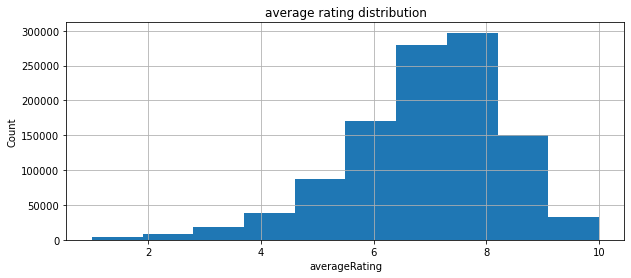

In [21]:
# plot graph of 'average rating column'
# Checking distribution of ratings

plt.figure(figsize =(10, 4))   
ratings_df['averageRating'].hist(bins = 10)
plt.xlabel('averageRating')
plt.ylabel('Count')
plt.title(r'average rating distribution')

In [22]:
# Renaming columns
actor_df = actor_df.rename(columns={'actorName':'actors'})
directors_df = directors_df.rename(columns={'directorName':'director'})
ratings_df = ratings_df.rename(columns={'averageRating':'rating'})

Merging all datasets on common column 'tconst'..
First Merging basics with actor casts..
Then merging it with directors..
Then merging it with Ratings..
Then merging it with info

In [23]:
final_movies_df= pd.merge(basics_df,actor_df,on='tconst',how='inner').merge(directors_df,on='tconst',how='inner').merge(ratings_df,on='tconst',how='inner').merge(titles_info_df,on='tconst',how='inner')

In [24]:
final_movies_df

,tconst,title,year,genres,actors,director,rating,region
0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance","Meg Ryan, Liev Schreiber, Breckin Meyer, Hugh ...",James Mangold,6.4,US
1,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance","Meg Ryan, Liev Schreiber, Breckin Meyer, Hugh ...",James Mangold,6.4,US
2,tt0064730,Japan Organized Crime Boss,2000,"Action, Crime","Noboru Andô, Tomisaburô Wakayama, Bunta Sugawa...",Kinji Fukasaku,7.0,US
3,tt0069049,The Other Side of the Wind,2018,Drama,"Peter Bogdanovich, John Huston, Susan Strasber...",Orson Welles,6.8,US
4,tt0081145,Me and the Kid,1993,"Comedy, Crime, Drama","Danny Aiello, Cathy Moriarty, Joe Pantoliano, ...",Dan Curtis,5.4,US
...,...,...,...,...,...,...,...,...
58545,tt9904802,Enemy Lines,2020,War,"John Hannah, Corey Johnson, Tom Wisdom, Ed Wes...",Anders Banke,4.9,US
58546,tt9904820,American Terror Story,2019,Horror,"Laurie Cummings, Cindy Hanska, Rim Basma, Winn...",Terry Spears,3.0,US
58547,tt9906644,Manoharam,2019,"Comedy, Drama","Aparna Das, Indrans, Vineeth Sreenivasan, Basi...",Anvar Sadik,6.8,US
58548,tt9913660,No Apology,2019,Drama,"Marya Delver, Pierce Briggs, Owen Bishop, Julz...",Gilbert Allan,5.0,US


In [25]:
final_movies_df['combine']= final_movies_df['genres']+","+final_movies_df['actors']+","+final_movies_df['director']

In [26]:
# Droping duplicate movie titles and movie ids 'tconst'

final_movies_df.drop_duplicates(subset='tconst', keep="first", inplace=True)
final_movies_df.drop_duplicates(subset='title', keep="first", inplace=True)

In [27]:
# Droping Region column as its not needed any more

final_movies_df.drop(['region'], axis = 1, inplace=True) 

In [28]:
def names_together_lower(x):
    x=np.char.lower(x)
    x=np.char.replace(x," ", "")
    x=np.char.replace(x,","," ")
    return x

In [29]:
# Applying names_together_lower function to 'combine' column and storing it new 'combined' column

final_movies_df['combined']=final_movies_df['combine'].apply(names_together_lower)

In [30]:
# droping combine column as it is not needed any more

final_movies_df.drop('combine', inplace=True, axis=1)

In [31]:
# Reseting index because index is not in continuos order

final_movies_df.reset_index(drop=True, inplace=True)

In [32]:
final_movies_df

,tconst,title,year,genres,actors,director,rating,combined
0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance","Meg Ryan, Liev Schreiber, Breckin Meyer, Hugh ...",James Mangold,6.4,comedy fantasy romance megryan lievschreiber b...
1,tt0064730,Japan Organized Crime Boss,2000,"Action, Crime","Noboru Andô, Tomisaburô Wakayama, Bunta Sugawa...",Kinji Fukasaku,7.0,action crime noboruandô tomisaburôwakayama bun...
2,tt0069049,The Other Side of the Wind,2018,Drama,"Peter Bogdanovich, John Huston, Susan Strasber...",Orson Welles,6.8,drama peterbogdanovich johnhuston susanstrasbe...
3,tt0081145,Me and the Kid,1993,"Comedy, Crime, Drama","Danny Aiello, Cathy Moriarty, Joe Pantoliano, ...",Dan Curtis,5.4,comedy crime drama dannyaiello cathymoriarty j...
4,tt0094900,Committed,1991,"Drama, Thriller","Robert Forster, Jennifer O'Neill, Ron Palillo,...",William A. Levey,5.1,drama thriller robertforster jennifero'neill r...
...,...,...,...,...,...,...,...,...
46390,tt9904670,Mountain Quest,2018,Documentary,Willem Dafoe,Jennifer Peedom,9.1,documentary willemdafoe jenniferpeedom
46391,tt9904802,Enemy Lines,2020,War,"John Hannah, Corey Johnson, Tom Wisdom, Ed Wes...",Anders Banke,4.9,war johnhannah coreyjohnson tomwisdom edwestwi...
46392,tt9904820,American Terror Story,2019,Horror,"Laurie Cummings, Cindy Hanska, Rim Basma, Winn...",Terry Spears,3.0,horror lauriecummings cindyhanska rimbasma win...
46393,tt9906644,Manoharam,2019,"Comedy, Drama","Aparna Das, Indrans, Vineeth Sreenivasan, Basi...",Anvar Sadik,6.8,comedy drama aparnadas indrans vineethsreeniva...


### Final Files to CSV

In [33]:
# Saving Dataset to pickle file

final_movies_df.to_pickle('Final_MovieData.pkl')

In [34]:
# Saving Dataset to csv file

final_movies_df.to_csv('Final_MovieData.csv')